In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import image
import matplotlib.pyplot as plt

In [2]:
healthy_img = image.imread('../example_images/IM-0127-0001.jpeg')
bacteria_img = image.imread('../example_images/person338_bacteria_1568.jpeg')
virus_img = image.imread('../example_images/person340_virus_698.jpeg')
target_height, target_width = (256, 256)
print(f'Shape of healthy x-ray: {healthy_img.shape}')
print(f'Shape of bacterial x-ray: {bacteria_img.shape}')
print(f'Shape of viral x-ray: {virus_img.shape}')

Shape of healthy x-ray: (1306, 1974)
Shape of bacterial x-ray: (752, 1240)
Shape of viral x-ray: (1432, 1760)


In [3]:
healthy_batch = np.expand_dims(np.expand_dims(healthy_img, 2), 0)
print(f'Healthy batch shape before extracting patches: {healthy_batch.shape}')

Healthy batch shape before extracting patches: (1, 1306, 1974, 1)


In [4]:
healthy_patches = tf.extract_image_patches(healthy_batch,
                                           ksizes=[1, target_height, target_width, 1],
                                           strides=[1, target_height, target_width, 1],
                                           rates=[1, 1, 1, 1],
                                           padding='SAME')
batch_size, num_windows_height, num_windows_width = healthy_patches.shape[0:3]
new_batch_size = batch_size * num_windows_width * num_windows_height
healthy_patches = tf.reshape(healthy_patches, (new_batch_size, 256, 256))
print(f'Healthy batch shape after extracting patches {healthy_patches.shape}')

Healthy batch shape after extracting patches (48, 256, 256)


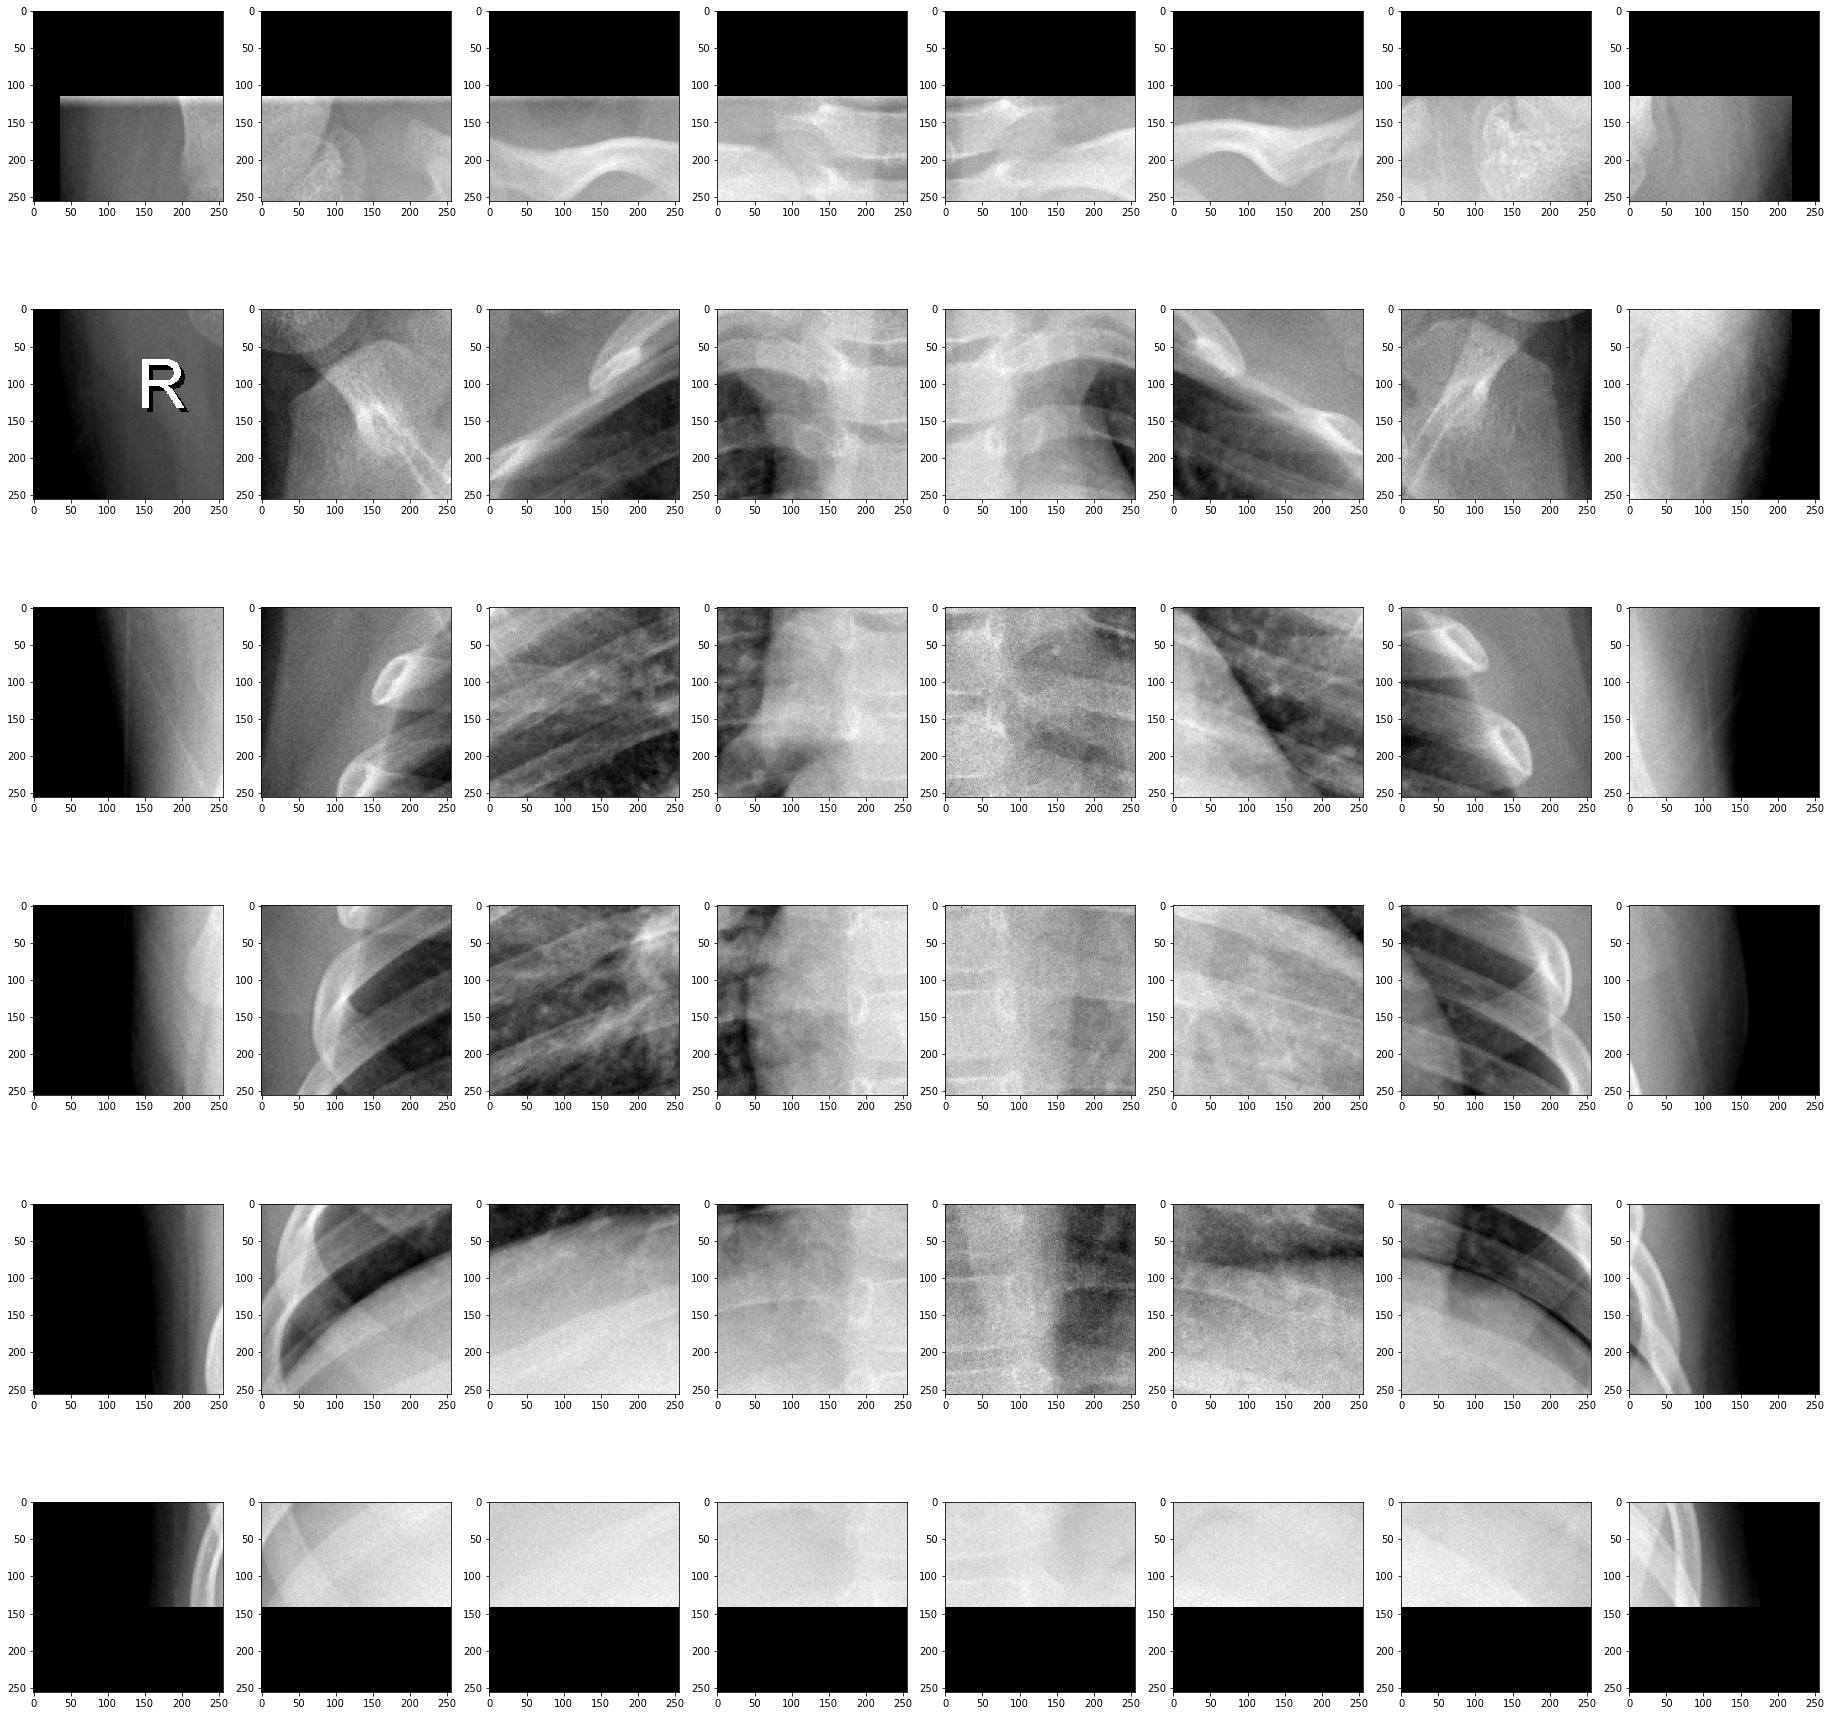

In [5]:
healthy_patches_np = healthy_patches.eval(session=tf.compat.v1.Session())
fig, axs = plt.subplots(int(num_windows_height), int(num_windows_width), figsize=(32.0, 32.0))
for i in range(int(num_windows_height)):
    for j in range(int(num_windows_width)):
        axs[i, j].imshow(healthy_patches_np[(i*num_windows_width)+j, :, :], cmap='gray')

In [6]:
bacteria_batch = np.expand_dims(np.expand_dims(bacteria_img, 2), 0)
print(f'Bacterial batch shape before extracting patches: {bacteria_batch.shape}')

Bacterial batch shape before extracting patches: (1, 752, 1240, 1)


In [7]:
bacteria_patches = tf.extract_image_patches(bacteria_batch,
                                            ksizes=[1, target_height, target_width, 1],
                                            strides=[1, target_height, target_width, 1],
                                            rates=[1, 1, 1, 1],
                                            padding='SAME')
batch_size, num_windows_height, num_windows_width = bacteria_patches.shape[0:3]
new_batch_size = batch_size * num_windows_width * num_windows_height
bacteria_patches = tf.reshape(bacteria_patches, (new_batch_size, 256, 256))
print(f'Bacterial batch shape after extracting patches {bacteria_patches.shape}')

Bacterial batch shape after extracting patches (15, 256, 256)


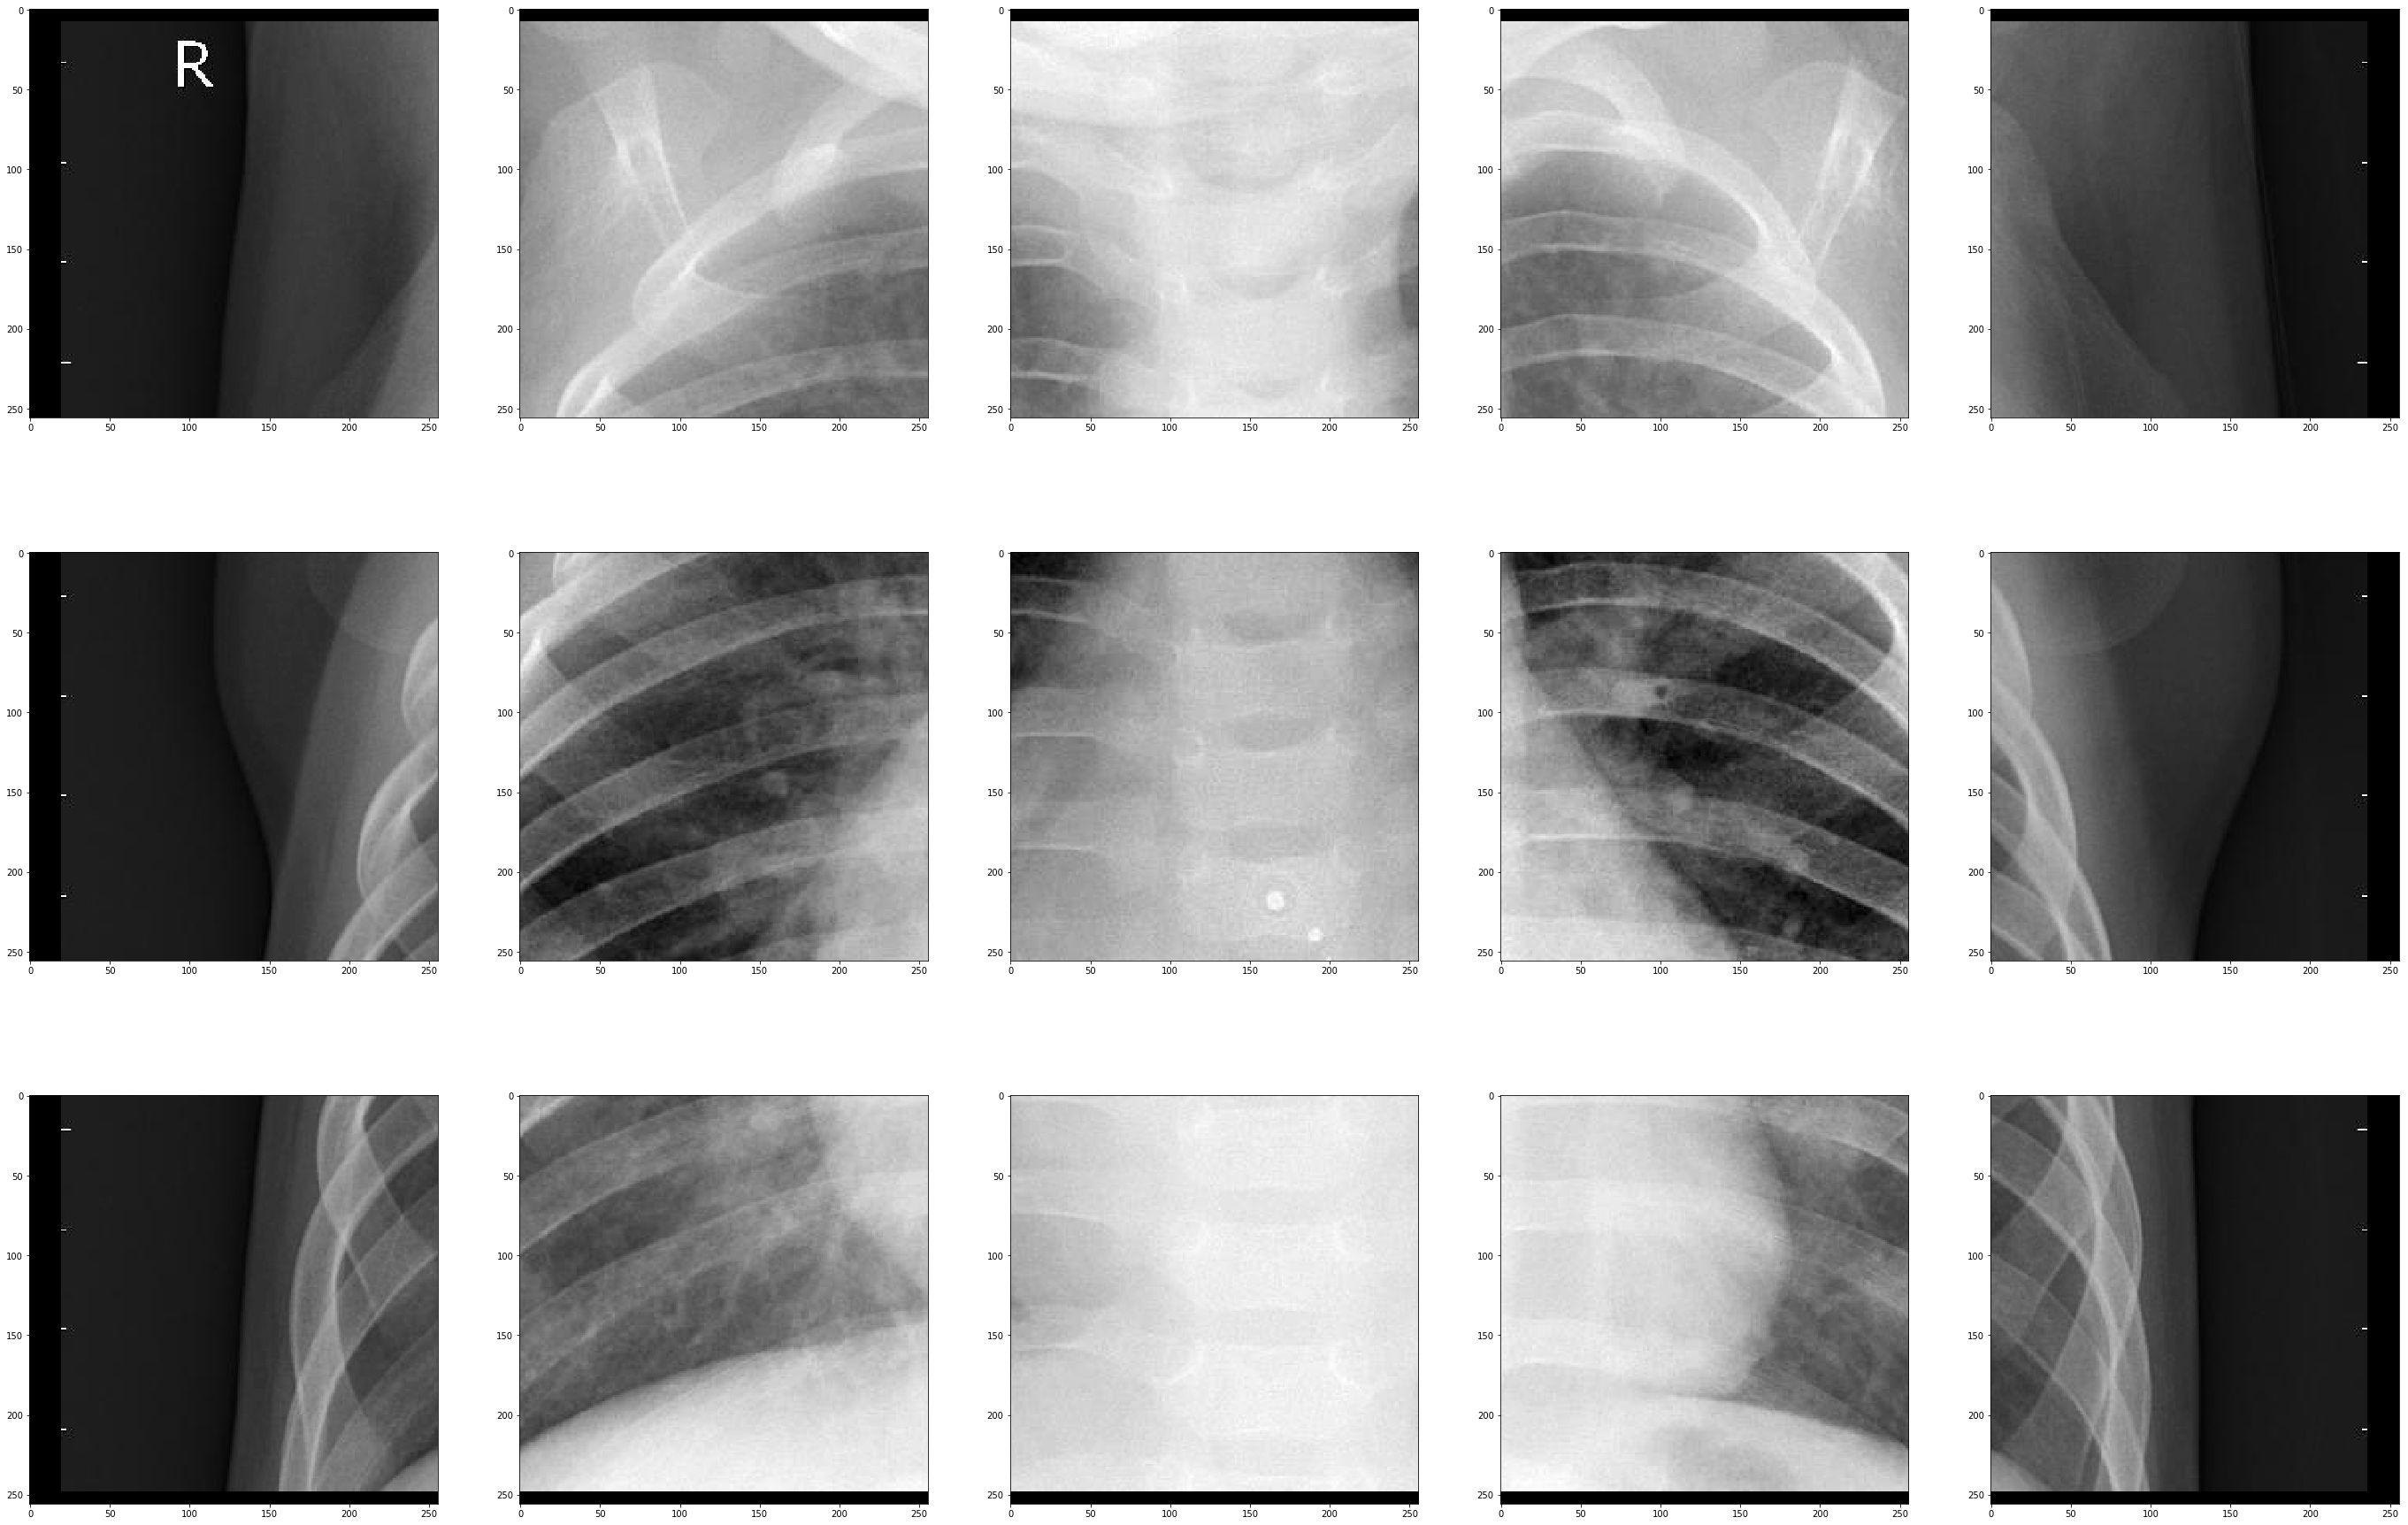

In [8]:
bacteria_patches_np = bacteria_patches.eval(session=tf.compat.v1.Session())
fig, axs = plt.subplots(int(num_windows_height), int(num_windows_width), figsize=(48.0, 32.0))
for i in range(int(num_windows_height)):
    for j in range(int(num_windows_width)):
        axs[i, j].imshow(bacteria_patches_np[(i*num_windows_width)+j, :, :], cmap='gray')

In [9]:
virus_batch = np.expand_dims(np.expand_dims(virus_img, 2), 0)
print(f'Viral batch shape before extracting patches: {virus_batch.shape}')

Viral batch shape before extracting patches: (1, 1432, 1760, 1)


In [10]:
virus_patches = tf.extract_image_patches(virus_batch,
                                         ksizes=[1, target_height, target_width, 1],
                                         strides=[1, target_height, target_width, 1],
                                         rates=[1, 1, 1, 1],
                                         padding='SAME')
batch_size, num_windows_height, num_windows_width = virus_patches.shape[0:3]
new_batch_size = batch_size * num_windows_width * num_windows_height
virus_patches = tf.reshape(virus_patches, (new_batch_size, 256, 256))
print(f'Viral batch shape after extracting patches {virus_patches.shape}')

Viral batch shape after extracting patches (42, 256, 256)


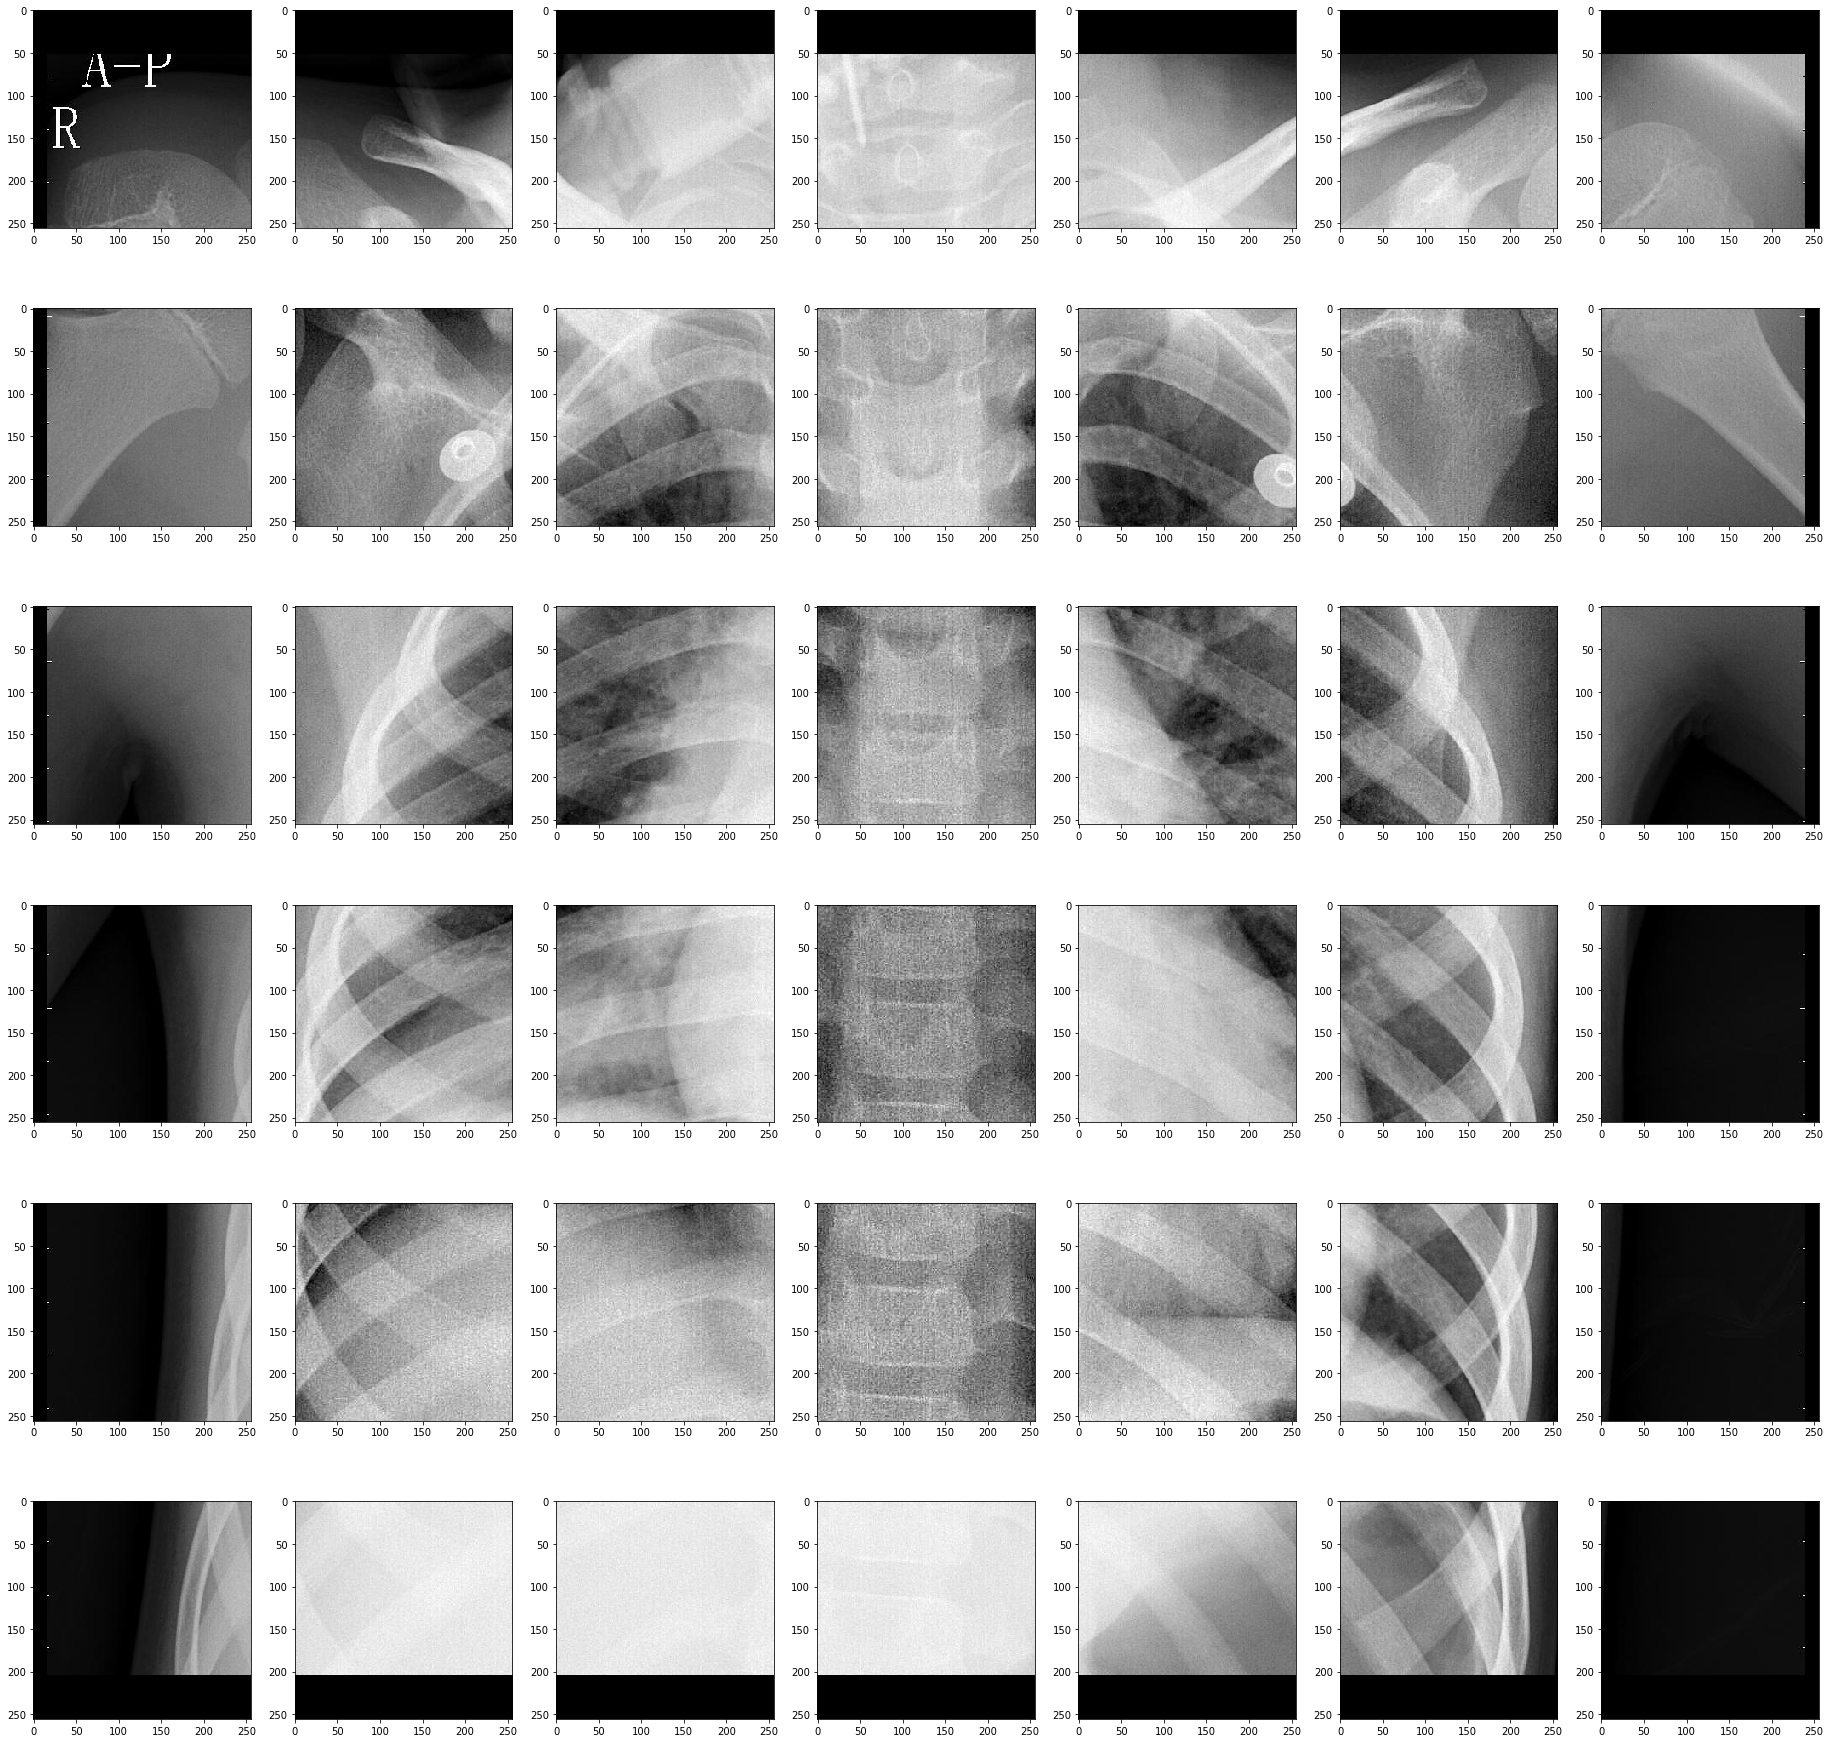

In [11]:
virus_patches_np = virus_patches.eval(session=tf.compat.v1.Session())
fig, axs = plt.subplots(int(num_windows_height), int(num_windows_width), figsize=(32.0, 32.0))
for i in range(int(num_windows_height)):
    for j in range(int(num_windows_width)):
        axs[i, j].imshow(virus_patches_np[(i*num_windows_width)+j, :, :], cmap='gray')